## Compute performance metrics for the given Y and Y_score without sklearn

## A. Compute performance metrics for the given data '5_a.csv'

unique [0. 1.]

confusion matrix: 
 [[    0.   100.]
 [    0. 10000.]]

TN = 0.0, FP = 100.0, FN=0.0, TP=10000.0

 True

F1 Score :  0.9950248756218906

Accuracy score :  0.9900990099009901
AUC score for 5a.csv :  0.48829900000000004


Text(0.5, 1.0, 'AUC=0.4883')

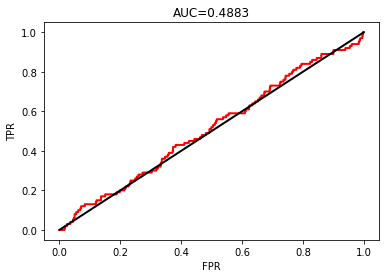

In [2]:
def conf_mat(y_act,y_pred):
    unique_classes = np.unique(y_act)    #unique classes in the dataset
    print('unique',unique_classes)
    confusion_mat = np.zeros((len(unique_classes), len(unique_classes)))   #creates 2x2 zero matrix for binary class
    
    for i in range(len(unique_classes)):  # Calculating the confusion matrix
        for j in range(len(unique_classes)):
            confusion_mat[i,j] = np.sum((y_act == unique_classes[i]) & (y_pred == unique_classes[j]))
    return confusion_mat

def tpr_fpr(df):  # Calculating TPR & FPR
    tp = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
    fp = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
    tn = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
    fn = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()
    
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    
    return [tpr, fpr]

def diff_threshold_tpr_fpr(data):
    tpr_arr = []
    fpr_arr = []
    
    sorted_data = data.sort_values(by=['proba'], ascending=False)
    unique_thres = sorted_data['proba'].unique()
    
    for threshold in unique_thres:  # TPr & FPR for different Thresholds
        sorted_data['y_predicted'] = np.where(sorted_data['proba'] >= threshold, 1, 0)
        tpr_fpr_arr = tpr_fpr(sorted_data)
        tpr_arr.append(tpr_fpr_arr[0])
        fpr_arr.append(tpr_fpr_arr[1])
    
    return tpr_arr, fpr_arr



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_5a = pd.read_csv('5_a.csv')
data_5a['y_pred'] = np.where(data_5a['proba'] >= 0.5, float(1), float(0))

y = data_5a.iloc[: , 0].values

y_prob = data_5a.iloc[: , 1]

y_pred = data_5a.iloc[: , 2]

a = conf_mat(y,y_pred)
print("\nconfusion matrix: \n",a)

tn,fp,fn,tp = a.ravel()
print("\nTN = {0}, FP = {1}, FN={2}, TP={3}".format(tn,fp,fn,tp))

total = np.concatenate(a).sum()
print('\n',total == len(y))  # check if number of elements in data matches with confusion matrix.

precision = tp/(tp + fp)

recall = tp/(tp + fn)

f1_score = (2*(precision*recall))/(precision+recall)
print('\nF1 Score : ',f1_score)

accuracy_score = (tp + tn)/total
print('\nAccuracy score : ',accuracy_score)

all_tpr, all_fpr = diff_threshold_tpr_fpr(data_5a)
auc_score_5a = np.trapz(all_tpr, all_fpr)
print("AUC score for 5a.csv : ",auc_score_5a)

# plotting TPR vs FPR

plt.plot(all_tpr, all_fpr, 'r', lw=2)
plt.plot([0,1], [0,1], 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={}'.format(round(auc_score_5a, 4)))


### Verifying with SKLearn

In [9]:
#skl

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

sklearn_confustion_matrix = confusion_matrix(y, y_pred)
print('sklearn confusion matrix :\n',sklearn_confustion_matrix)
sklearn_f1_score = f1_score(y, y_pred)
print('\nsklearn_f1_score : ', sklearn_f1_score)
sklearn_accuracy_score = accuracy_score(y, y_pred)
print('\nsklearn_accuracy_score ', sklearn_accuracy_score)

sklearn_roc_auc_score = roc_auc_score(y, y_prob)
print('\nsk-learn roc_auc_score: ', sklearn_roc_auc_score)


sklearn confusion matrix :
 [[    0   100]
 [    0 10000]]

sklearn_f1_score :  0.9950248756218906

sklearn_accuracy_score  0.9900990099009901

sk-learn roc_auc_score:  0.48829900000000004


## B. Compute performance metrics for the given data '5_b.csv'

In [10]:
data_5b = pd.read_csv('5_b.csv')
#data_5b.columns
data_5b['y_pred'] = np.where(data_5b['proba'] >= 0.5, float(1), float(0))

y_b = data_5b.iloc[: , 0].values

y_prob_b = data_5b.iloc[: , 1]

y_pred_b = data_5b.iloc[: , 2]

b = conf_mat(y_b,y_pred_b)
print("\nconfusion matrix: \n",b)

tn_b,fp_b,fn_b,tp_b = b.ravel()
print("\nTN = {0}, FP = {1}, FN={2}, TP={3}".format(tn_b,fp_b,fn_b,tp_b))

total_b = np.concatenate(b).sum()
print('\n',total == len(y_b))  # check if number of elements in data matches with confusion matrix.

precision_b = tp_b/(tp_b + fp_b)

recall_b = tp_b/(tp_b + fn_b)

f1_score_5b = (2*(precision_b*recall_b))/(precision_b+recall_b)
print('\nF1 Score : ',f1_score_5b)

accuracy_score_5b = (tp_b + tn_b)/total_b
print('\nAccuracy score : ',accuracy_score_5b)

all_tpr_b, all_fpr_b = diff_threshold_tpr_fpr(data_5b)
auc_score_5b = np.trapz(all_tpr_b, all_fpr_b)
print("AUC score for 5b.csv : ",auc_score_5b)

unique [0. 1.]

confusion matrix: 
 [[9761.  239.]
 [  45.   55.]]

TN = 9761.0, FP = 239.0, FN=45.0, TP=55.0

 True

F1 Score :  0.2791878172588833

Accuracy score :  0.9718811881188119
AUC score for 5b.csv :  0.9377570000000001


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

In [8]:
def metric(y_act, y_prob, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    min_a = float('inf')    # Initializing the min_a with infinity
    
    for i in range(len(y_prob)):
        if y_prob[i] >= threshold:
            if y_act[i] == 1:
                tp += 1
            else:
                fp += 1
                
        if y_prob[i] < threshold:
            if y_act[i] == 0:
                tn += 1
            else:
                fn += 1
                
    A = (500*fn)+(100*fp)
    
    return A

def min_A(y_act, y_prob, unique_thresh):
    min_a = float('inf')
    min_t = 0
    
    for threshold in unique_thresh:
        a = metric(y_act,y_prob,threshold)
        if a <= min_a:
            min_a = min(a, min_a)
            min_t = threshold
            
    return min_a, min_t


data_5c = pd.read_csv('5_c.csv')
y_act_5c = data_5c.iloc[:, 0].values
y_prob_5c = data_5c.iloc[:,1].values

unique_thresholds = np.unique(y_prob_5c)
#print(unique_thresholds)

A = min_A(y_act_5c,y_prob_5c,unique_thresholds)
print("Minimum value of A is {0} and its threshold is {1}".format(A[0],A[1]))

Minimum value of A is 141000 and its threshold is 0.2300390278970873


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv

In [7]:
def Calc_errors(y, y_pred):
    y_bar = y.mean()
    
    ss_residual = ((y - y_pred)**2).sum()
    ss_total = ((y - y_bar)**2).sum()
    
    mse = np.mean((y - y_pred)**2)
    
    mape = np.mean((np.abs(y - y_pred)) / np.mean(y))*100
    
    R2_score = 1-(ss_residual/ss_total)
    
    return mse,mape,R2_score
    


data_5d = pd.read_csv('5_d.csv')
y_5d = data_5d.iloc[:, 0].values

y_pred_5d = data_5d.iloc[:, 1].values

mse,mape,R2 = Calc_errors(y_5d, y_pred_5d)

print("Mean Square error is ", mse)
print("\nMean Absolute Percentage error is ", mape)
print("\nR^2 error is ", R2)

Mean Square error is  177.16569974554707

Mean Absolute Percentage error is  12.912029940096867

R^2 error is  0.9563582786990937
